In [63]:
#Dependencies
import requests
import json
import gmaps
from matplotlib import pyplot as plt
from scipy import stats
from scipy.stats import linregress
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [64]:
# The path to our CSV file
file_gdp = "suicides_vs_gdp_o.csv"

# Read Suicide Data our Kickstarter data into pandas
su_vs_gdp_o_df = pd.read_csv(file_gdp)
su_vs_gdp_o_df.head()

,index,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,year_gdp,gdp_per_capita,generation
0,0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,2.160000e+09,796.0,Generation X
1,1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,2.160000e+09,796.0,Silent
2,2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,2.160000e+09,796.0,Generation X
3,3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,2.160000e+09,796.0,G.I. Generation
4,4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,2.160000e+09,796.0,Boomers


In [65]:
su_vs_gdp_o_df.columns

Index(['index', 'country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'year_gdp', 'gdp_per_capita',
       'generation'],
      dtype='object')

In [66]:
su_vs_gdp_o_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
index                27820 non-null int64
country              27820 non-null object
year                 27820 non-null int64
sex                  27820 non-null object
age                  27820 non-null object
suicides_no          27820 non-null int64
population           27820 non-null int64
suicides/100k pop    27820 non-null float64
country-year         27820 non-null object
year_gdp             27820 non-null float64
gdp_per_capita       27820 non-null float64
generation           27820 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 2.5+ MB


In [113]:
su_vs_gdp_df = su_vs_gdp_o_df.groupby('country-year').agg({'country':'first', 'year':'first', 
                                                           'suicides_no':'sum','population':'sum', 
                                                           'suicides/100k pop':'sum',
                                                           'year_gdp':'first',
                                                           'gdp_per_capita':'first'})
su_vs_gdp_df.head()

,country,year,suicides_no,population,suicides/100k pop,year_gdp,gdp_per_capita
country-year,,,,,,,
Albania1987,Albania,1987,73,2709600,31.85,2.160000e+09,796.0
Albania1988,Albania,1988,63,2764300,32.46,2.130000e+09,769.0
Albania1989,Albania,1989,68,2803100,33.40,2.340000e+09,833.0
Albania1992,Albania,1992,47,2822500,18.00,7.090000e+08,251.0
Albania1993,Albania,1993,73,2807300,32.56,1.230000e+09,437.0


In [114]:
su_vs_gdp_df.to_csv('cleaned_su_vs_gdp.csv')

In [115]:
file_gdp2 = "cleaned_su_vs_gdp.csv"

su_vs_gdp_c_df = pd.read_csv(file_gdp2)
su_vs_gdp_c_df.head(100)

,country-year,country,year,suicides_no,population,suicides/100k pop,year_gdp,gdp_per_capita
0,Albania1987,Albania,1987,73,2709600,31.85,2.160000e+09,796.0
1,Albania1988,Albania,1988,63,2764300,32.46,2.130000e+09,769.0
2,Albania1989,Albania,1989,68,2803100,33.40,2.340000e+09,833.0
3,Albania1992,Albania,1992,47,2822500,18.00,7.090000e+08,251.0
4,Albania1993,Albania,1993,73,2807300,32.56,1.230000e+09,437.0
5,Albania1994,Albania,1994,50,2849300,32.18,1.990000e+09,697.0
6,Albania1995,Albania,1995,88,2903400,40.55,2.420000e+09,835.0
7,Albania1996,Albania,1996,89,2940200,43.62,3.310000e+09,1127.0
8,Albania1997,Albania,1997,170,2977300,77.43,2.360000e+09,793.0
9,Albania1998,Albania,1998,154,3012700,66.52,2.710000e+09,899.0


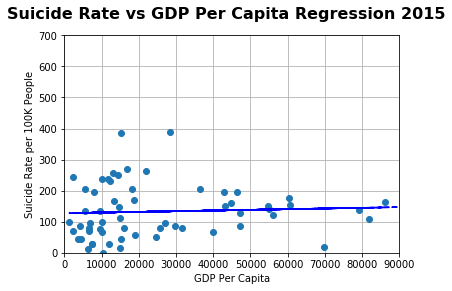

Signifigance of Correlation between GDP per Capita and Suicide Rate per 100000 People in 2015 is:
6.473428857063964e-12
Strength of Correlation, or Regression Slope, between GDP per Capita and Suicide Rate per 100000 People in 2015 is:
0.0002170250891352828


In [116]:
su_vs_gdp_2015_df = su_vs_gdp_c_df.query("year == '2015'")

x_axis_2015 = su_vs_gdp_2015_df['gdp_per_capita']
y_axis_2015 = su_vs_gdp_2015_df['suicides/100k pop']

(slope, intercept, _, _, _) = linregress(x_axis_2015, y_axis_2015)
fit = slope * x_axis_2015 + intercept

fig, ax_2015 = plt.subplots()

fig.suptitle("Suicide Rate vs GDP Per Capita Regression 2015", fontsize=16, fontweight="bold")

ax_2015.set_xlim(0, 90000)
ax_2015.set_ylim(0, 700)

ax_2015.set_xlabel("GDP Per Capita")
ax_2015.set_ylabel("Suicide Rate per 100K People")

ax_2015.plot(x_axis_2015, y_axis_2015, linewidth=0, marker='o')
ax_2015.plot(x_axis_2015, fit, 'b--')
plt.grid(True)

plt.savefig("Sui_vs_GDPPerCap_regression_2015.png")

plt.show()
(t_stat, p) = stats.ttest_ind(x_axis_2015, y_axis_2015, equal_var=False)
print("Signifigance of Correlation between GDP per Capita and Suicide Rate per 100000 People in 2015 is:")
print(p)

print("Strength of Correlation, or Regression Slope, between GDP per Capita and Suicide Rate per 100000 People in 2015 is:")
print(slope)

In [117]:
su_vs_gdp_2015_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 48 to 2298
Data columns (total 8 columns):
country-year         62 non-null object
country              62 non-null object
year                 62 non-null int64
suicides_no          62 non-null int64
population           62 non-null int64
suicides/100k pop    62 non-null float64
year_gdp             62 non-null float64
gdp_per_capita       62 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 4.4+ KB


In [118]:
su_vs_gdp_percap_high_2015_df = su_vs_gdp_2015_df.sort_values(by=['gdp_per_capita'], ascending=False)
su_vs_gdp_percap_high_2015_df.head(10)

,country-year,country,year,suicides_no,population,suicides/100k pop,year_gdp,gdp_per_capita
1307,Luxembourg2015,Luxembourg,2015,64,537748,134.40,5.780000e+10,107456.0
2083,Switzerland2015,Switzerland,2015,1073,7892502,164.66,6.790000e+11,86100.0
1899,Singapore2015,Singapore,2015,329,3719115,109.29,3.040000e+11,81800.0
1520,Norway2015,Norway,2015,590,4882909,136.43,3.870000e+11,79200.0
1686,Qatar2015,Qatar,2015,66,2354147,18.84,1.650000e+11,69900.0
148,Australia2015,Australia,2015,3027,22240785,154.18,1.350000e+12,60700.0
2270,United States2015,United States,2015,44189,300078511,175.41,1.810000e+13,60400.0
640,Denmark2015,Denmark,2015,564,5383060,121.42,3.010000e+11,56000.0
1004,Iceland2015,Iceland,2015,40,308554,140.65,1.690000e+10,54909.0
2061,Sweden2015,Sweden,2015,1182,9114524,149.30,4.980000e+11,54600.0


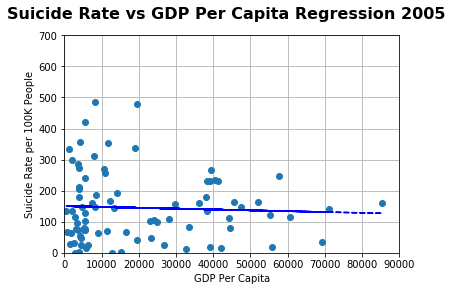

Signifigance of Correlation between GDP per Capita and Suicide Rate per 100000 People in 2005 is:
3.094934882144788e-14
Strength of Correlation, or Regression Slope, between GDP per Capita and Suicide Rate per 100000 People in 2005 is:
-0.0002717406510160259


In [119]:
su_vs_gdp_2005_df = su_vs_gdp_c_df.query("year == '2005'")

x_axis_2005 = su_vs_gdp_2005_df['gdp_per_capita']
y_axis_2005 = su_vs_gdp_2005_df['suicides/100k pop']

(slope, intercept, _, _, _) = linregress(x_axis_2005, y_axis_2005)
fit = slope * x_axis_2005 + intercept

fig, ax_2005 = plt.subplots()

fig.suptitle("Suicide Rate vs GDP Per Capita Regression 2005", fontsize=16, fontweight="bold")

ax_2005.set_xlim(0, 90000)
ax_2005.set_ylim(0, 700)

ax_2005.set_xlabel("GDP Per Capita")
ax_2005.set_ylabel("Suicide Rate per 100K People")

ax_2005.plot(x_axis_2005, y_axis_2005, linewidth=0, marker='o')
ax_2005.plot(x_axis_2005, fit, 'b--')
plt.grid(True)

plt.savefig("Sui_vs_GDPPerCap_regression_2005.png")

plt.show()
(t_stat, p) = stats.ttest_ind(x_axis_2005, y_axis_2005, equal_var=False)
print("Signifigance of Correlation between GDP per Capita and Suicide Rate per 100000 People in 2005 is:")
print(p)

print("Strength of Correlation, or Regression Slope, between GDP per Capita and Suicide Rate per 100000 People in 2005 is:")
print(slope)

In [129]:
su_vs_gdp_percap_high_2005_df = su_vs_gdp_2005_df.sort_values(by=['gdp_per_capita'], ascending=False)
su_vs_gdp_percap_high_2005_df.head(62)

,country-year,country,year,suicides_no,population,suicides/100k pop,year_gdp,gdp_per_capita
1297,Luxembourg2005,Luxembourg,2005,49,437338,159.07,3.730000e+10,85397.0
1510,Norway2005,Norway,2005,533,4335092,142.09,3.090000e+11,71200.0
1832,San Marino2005,San Marino,2005,1,28264,34.01,1.960000e+09,69301.0
994,Iceland2005,Iceland,2005,33,274929,115.00,1.670000e+10,60712.0
2073,Switzerland2005,Switzerland,2005,1299,7071991,246.19,4.090000e+11,57800.0
1676,Qatar2005,Qatar,2005,17,796618,18.80,4.450000e+10,55899.0
1026,Ireland2005,Ireland,2005,451,3833357,121.11,2.120000e+11,55200.0
630,Denmark2005,Denmark,2005,631,5089852,164.23,2.640000e+11,52000.0
2260,United States2005,United States,2005,32629,276106680,146.68,1.310000e+13,47400.0
2051,Sweden2005,Sweden,2005,1219,8538624,164.62,3.890000e+11,45600.0


In [152]:
countries_pd_2015 = su_vs_gdp_2015_df
countries_pd_2015["Lat"] = ""
countries_pd_2015["Lng"] = ""

countries_pd_2015.head(100)

C:\Users\JohnRead\anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\JohnRead\anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,country-year,country,year,suicides_no,population,suicides/100k pop,year_gdp,gdp_per_capita,Lat,Lng
48,Antigua and Barbuda2015,Antigua and Barbuda,2015,1,91889,15.62,1.360000e+09,14853.0,,
79,Argentina2015,Argentina,2015,3073,39699624,112.13,5.950000e+11,15000.0,,
103,Armenia2015,Armenia,2015,74,2795335,45.28,1.060000e+10,3775.0,,
148,Australia2015,Australia,2015,3027,22240785,154.18,1.350000e+12,60700.0,,
179,Austria2015,Austria,2015,1251,8219386,194.62,3.820000e+11,46500.0,,
317,Belgium2015,Belgium,2015,1867,10624356,196.66,4.550000e+11,42800.0,,
345,Belize2015,Belize,2015,26,319835,135.46,1.780000e+09,5561.0,,
378,Brazil2015,Brazil,2015,11163,191087085,77.45,1.800000e+12,9430.0,,
469,Chile2015,Chile,2015,1838,16565725,147.68,2.440000e+11,14700.0,,
500,Colombia2015,Colombia,2015,2332,44490427,70.40,2.920000e+11,6550.0,,


In [153]:
from gconfig import (gkey)
gmaps.configure(api_key=gkey)

In [154]:
params = {"key": gkey}

for index, row in countries_pd_2015.iterrows():
    base_url = "https://maps.googleapis.com/maps/api/geocode/json"

    country = row['country'] 
    params['address'] = f"{country}"
    country_lat_lng = requests.get(base_url, params=params)
    country_lat_lng = country_lat_lng.json()

    countries_pd_2015.loc[index, "Lat"] = country_lat_lng["results"][0]["geometry"]["location"]["lat"]
    countries_pd_2015.loc[index, "Lng"] = country_lat_lng["results"][0]["geometry"]["location"]["lng"]

countries_pd_2015.head(62)

,country-year,country,year,suicides_no,population,suicides/100k pop,year_gdp,gdp_per_capita,Lat,Lng
48,Antigua and Barbuda2015,Antigua and Barbuda,2015,1,91889,15.62,1.360000e+09,14853.0,17.0608,-61.7964
79,Argentina2015,Argentina,2015,3073,39699624,112.13,5.950000e+11,15000.0,-38.4161,-63.6167
103,Armenia2015,Armenia,2015,74,2795335,45.28,1.060000e+10,3775.0,40.0691,45.0382
148,Australia2015,Australia,2015,3027,22240785,154.18,1.350000e+12,60700.0,-25.2744,133.775
179,Austria2015,Austria,2015,1251,8219386,194.62,3.820000e+11,46500.0,47.5162,14.5501
317,Belgium2015,Belgium,2015,1867,10624356,196.66,4.550000e+11,42800.0,50.5039,4.46994
345,Belize2015,Belize,2015,26,319835,135.46,1.780000e+09,5561.0,17.1899,-88.4976
378,Brazil2015,Brazil,2015,11163,191087085,77.45,1.800000e+12,9430.0,-14.235,-51.9253
469,Chile2015,Chile,2015,1838,16565725,147.68,2.440000e+11,14700.0,-35.6751,-71.543
500,Colombia2015,Colombia,2015,2332,44490427,70.40,2.920000e+11,6550.0,4.57087,-74.2973


In [146]:
countries_pd_2005 = su_vs_gdp_2005_df
countries_pd_2005["Lat"] = ""
countries_pd_2005["Lng"] = ""

countries_pd_2005.head(84)

C:\Users\JohnRead\anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\JohnRead\anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,country-year,country,year,suicides_no,population,suicides/100k pop,year_gdp,gdp_per_capita,Lat,Lng
16,Albania2005,Albania,2005,0,2783320,0.00,8.160000e+09,2931.0,,
40,Antigua and Barbuda2005,Antigua and Barbuda,2005,0,80809,0.00,1.020000e+09,12649.0,,
69,Argentina2005,Argentina,2005,3058,35550617,128.18,1.990000e+11,5590.0,,
112,Aruba2005,Aruba,2005,10,93728,99.58,2.330000e+09,24870.0,,
169,Austria2005,Austria,2005,1399,7827461,235.25,3.160000e+11,40400.0,,
211,Bahamas2005,Bahamas,2005,4,301763,13.32,9.840000e+09,32596.0,,
231,Bahrain2005,Bahrain,2005,42,819540,40.22,1.600000e+10,19485.0,,
257,Barbados2005,Barbados,2005,1,255889,2.58,3.900000e+09,15230.0,,
307,Belgium2005,Belgium,2005,2029,9901014,231.75,3.870000e+11,39100.0,,
335,Belize2005,Belize,2005,12,245020,46.10,1.110000e+09,4547.0,,


In [142]:
params = {"key": gkey}

for index, row in countries_pd_2005.iterrows():
    base_url = "https://maps.googleapis.com/maps/api/geocode/json"

    country = row['country'] 
    params['address'] = f"{country}"
    country_lat_lng = requests.get(base_url, params=params)
    country_lat_lng = country_lat_lng.json()

    countries_pd_2005.loc[index, "Lat"] = country_lat_lng["results"][0]["geometry"]["location"]["lat"]
    countries_pd_2005.loc[index, "Lng"] = country_lat_lng["results"][0]["geometry"]["location"]["lng"]

countries_pd_2005.head(84)

,country-year,country,year,suicides_no,population,suicides/100k pop,year_gdp,gdp_per_capita,Lat,Lng
16,Albania2005,Albania,2005,0,2783320,0.00,8.160000e+09,2931.0,41.1533,20.1683
40,Antigua and Barbuda2005,Antigua and Barbuda,2005,0,80809,0.00,1.020000e+09,12649.0,17.0608,-61.7964
69,Argentina2005,Argentina,2005,3058,35550617,128.18,1.990000e+11,5590.0,-38.4161,-63.6167
112,Aruba2005,Aruba,2005,10,93728,99.58,2.330000e+09,24870.0,12.5211,-69.9683
169,Austria2005,Austria,2005,1399,7827461,235.25,3.160000e+11,40400.0,47.5162,14.5501
211,Bahamas2005,Bahamas,2005,4,301763,13.32,9.840000e+09,32596.0,25.0343,-77.3963
231,Bahrain2005,Bahrain,2005,42,819540,40.22,1.600000e+10,19485.0,26.0667,50.5577
257,Barbados2005,Barbados,2005,1,255889,2.58,3.900000e+09,15230.0,13.1939,-59.5432
307,Belgium2005,Belgium,2005,2029,9901014,231.75,3.870000e+11,39100.0,50.5039,4.46994
335,Belize2005,Belize,2005,12,245020,46.10,1.110000e+09,4547.0,17.1899,-88.4976


In [158]:
countries_pd_2015.to_csv('country_vs_suicide_lat_2015.csv')
countries_pd_2005.to_csv('country_vs_suicide_lat_2005.csv')

In [91]:
# checkpoint

In [159]:
file_gdp3 = "country_vs_suicide_lat_2015.csv"
file_gdp4 = "country_vs_suicide_lat_2005.csv"

countries_pd_2015 = pd.read_csv(file_gdp3)
countries_pd_2005 = pd.read_csv(file_gdp4)

In [160]:
countries_pd_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 11 columns):
Unnamed: 0           62 non-null int64
country-year         62 non-null object
country              62 non-null object
year                 62 non-null int64
suicides_no          62 non-null int64
population           62 non-null int64
suicides/100k pop    62 non-null float64
year_gdp             62 non-null float64
gdp_per_capita       62 non-null float64
Lat                  62 non-null float64
Lng                  62 non-null float64
dtypes: float64(5), int64(4), object(2)
memory usage: 5.4+ KB


In [161]:
countries_pd_2005.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 12 columns):
Unnamed: 0           84 non-null int64
Unnamed: 0.1         84 non-null int64
country-year         84 non-null object
country              84 non-null object
year                 84 non-null int64
suicides_no          84 non-null int64
population           84 non-null int64
suicides/100k pop    84 non-null float64
year_gdp             84 non-null float64
gdp_per_capita       84 non-null float64
Lat                  84 non-null float64
Lng                  84 non-null float64
dtypes: float64(5), int64(5), object(2)
memory usage: 8.0+ KB


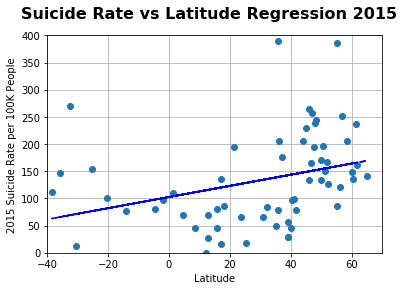

Signifigance of Correlation between Latitude and Suicide Rate per 100000 People in 2015 is:
1.2877857282748814e-13
Strength of Correlation, or Regression Slope, between Latitude and Suicide Rate per 100000 People in 2015 is:
1.026061088873344


In [162]:
Lat_2015 = countries_pd_2015['Lat']
Sui_2015 = countries_pd_2015['suicides/100k pop']

(slope, intercept, _, _, _) = linregress(Lat_2015, Sui_2015)
fit = slope * Lat_2015 + intercept

fig, La_2015 = plt.subplots()

fig.suptitle("Suicide Rate vs Latitude Regression 2015", fontsize=16, fontweight="bold")

La_2015.set_xlim(-40, 70)
La_2015.set_ylim(0, 400)

La_2015.set_xlabel("Latitude")
La_2015.set_ylabel("2015 Suicide Rate per 100K People")

La_2015.plot(Lat_2015, Sui_2015, linewidth=0, marker='o')
La_2015.plot(Lat_2015, fit, 'b--')
plt.grid(True)

plt.savefig("Sui_vs_Lat_regression_2015.png")

plt.show()
(t_stat, p) = stats.ttest_ind(Lat_2015, Sui_2015, equal_var=False)
print("Signifigance of Correlation between Latitude and Suicide Rate per 100000 People in 2015 is:")
print(p)

print("Strength of Correlation, or Regression Slope, between Latitude and Suicide Rate per 100000 People in 2015 is:")
print(slope)

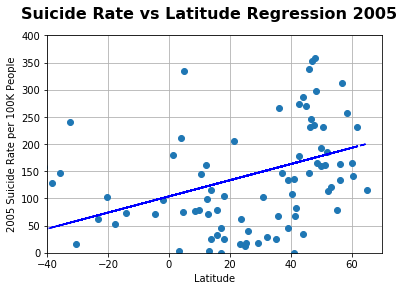

Signifigance of Correlation between Latitude and Suicide Rate per 100000 People in 2005 is:
4.411626093452958e-15
Strength of Correlation, or Regression Slope, between Latitude and Suicide Rate per 100000 People in 2005 is:
1.4871121903602686


In [163]:
Lat_2005 = countries_pd_2005['Lat']
Sui_2005 = countries_pd_2005['suicides/100k pop']

(slope, intercept, _, _, _) = linregress(Lat_2005, Sui_2005)
fit = slope * Lat_2005 + intercept

fig, La_2005 = plt.subplots()

fig.suptitle("Suicide Rate vs Latitude Regression 2005", fontsize=16, fontweight="bold")

La_2005.set_xlim(-40, 70)
La_2005.set_ylim(0, 400)

La_2005.set_xlabel("Latitude")
La_2005.set_ylabel("2005 Suicide Rate per 100K People")

La_2005.plot(Lat_2005, Sui_2005, linewidth=0, marker='o')
La_2005.plot(Lat_2005, fit, 'b--')
plt.grid(True)

plt.savefig("Sui_vs_Lat_regression_2005.png")

plt.show()
(t_stat, p) = stats.ttest_ind(Lat_2005, Sui_2005, equal_var=False)
print("Signifigance of Correlation between Latitude and Suicide Rate per 100000 People in 2005 is:")
print(p)

print("Strength of Correlation, or Regression Slope, between Latitude and Suicide Rate per 100000 People in 2005 is:")
print(slope)

In [ ]:
gmaps.configure(api_key=gkey)

In [164]:
# Create a poverty Heatmap layer

import gmaps
import gmaps.datasets
gmaps.configure(api_key=gkey)

map_df = countries_pd_2005[["Lat", "Lng", "suicides/100k pop"]]

fig = gmaps.figure(map_type='HYBRID', zoom_level=2, center=(20,-30))

heatmap_layer = gmaps.heatmap_layer(
    map_df[["Lat", "Lng"]], 
    weights = map_df["suicides/100k pop"],
    max_intensity = 200, 
    point_radius=20.0
)
fig.add_layer(heatmap_layer)

fig



Figure(layout=FigureLayout(height='420px'))

In [165]:
import gmaps
import gmaps.datasets
gmaps.configure(api_key=gkey)

map_df = countries_pd_2015[["Lat", "Lng", "suicides/100k pop"]]

fig = gmaps.figure(map_type='HYBRID', zoom_level=2, center=(20,-30))

heatmap_layer = gmaps.heatmap_layer(
    map_df[["Lat", "Lng"]], 
    weights = map_df["suicides/100k pop"],
    max_intensity = 200, 
    point_radius=20.0
)
fig.add_layer(heatmap_layer)

fig

Figure(layout=FigureLayout(height='420px'))